## STOCK MARKET ANALYSIS USING TIME-SERIES 
OIL AND GAS SECTORS [GUSH] EXCHANGE TRADED FUND (ETF) 30 DAYS TREND PREDICTION

## Overview 
•THE OIL AND GAS SECTOR PLAYS A PIVOTAL ROLE IN THE GLOBAL ECONOMY, ENERGY PRODUCTION, AND INVESTMENT LANDSCAPE.  
•THIS ANALYSIS PROVIDES INSIGHTS INTO THE DYNAMICS OF THE SECTOR, ITS SIGNIFICANCE, AND THE UTILIZATION OF TIME SERIES STOCK ANALYSIS TECHNIQUES FOR INFORMED DECISION-MAKING.

## OBJECTIVE 
•PREDICTING THE JUNE 2023 MARKET TRENDS FOR THE OIL AND GAS SECTOR STOCKS USING GUSH (ETF) AND COMPARING IT WITH DRIP (ETF)  
•UTILIZING LSTM MODELS, THE AIM IS TO PREDICT THE GUSH ETF'S MARKET TRENDS FOR THE NEXT 30 DAYS.   
•THIS ANALYSIS ENHANCES OUR UNDERSTANDING OF THE OIL AND GAS SECTOR, INFORMS INVESTMENT DECISIONS, AND CONTRIBUTES TO TIME SERIES STOCK ANALYSIS.  

## DATASET  
•SINCE A READILY AVAILABLE DATASET WASN'T ACCESSIBLE, I GENERATED AN API AND EMPLOYED SPECIFIC DATA READER LIBRARIES TO RETRIEVE THE NECESSARY DATA.  
•IN ORDER TO ACHIEVE SUFFICIENT HISTORICAL DATA AND LONG-TERM PATTERNS PLUS VARIABILITY, I DECIDED TO HAVE MY DATASET BE FOUR YEARS PERIOD TO PROVIDE VALUABLE INSIGHTS FOR THIS ANALYSIS.  
•THE DATA UTILIZED SPANS FROM JANUARY 1ST, 2019, TO MAY 27TH, 2023 

## Methodologies  
•EDA  
•PREPROCESSING   
•BUILDING MODEL    
•EVALUATION  
•FINAL PREDICTION   

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

In [2]:
# Create a Tiingo account to obtain an API that will use it for the pandas’ Datareader library. 
Tiingo_symbols = ['GUSH']
startdate = datetime(2019,1,1)
enddate = datetime(2023,5,27)
df = pdr.get_data_tiingo(Tiingo_symbols, start=startdate, end=enddate, api_key="1856777bbfc2e350f804bfd660d12ee0d35a50c3")
df

/Users/hassan/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


close      high      low    open    volume  \
symbol date                                                                     
GUSH   2019-01-02 00:00:00+00:00    8.44    8.6000    7.010    7.31   6850156   
       2019-01-03 00:00:00+00:00    8.30    8.7400    7.720    8.50   6353016   
       2019-01-04 00:00:00+00:00    9.65    9.6900    8.687    8.90   7241634   
       2019-01-07 00:00:00+00:00   10.69   10.9500    9.670    9.95  11164210   
       2019-01-08 00:00:00+00:00   10.98   11.4500   10.420   11.34   9749182   
...                                  ...       ...      ...     ...       ...   
       2023-05-22 00:00:00+00:00  115.98  118.0000  112.040  112.06    375221   
       2023-05-23 00:00:00+00:00  116.43  120.2900  116.260  117.71    348645   
       2023-05-24 00:00:00+00:00  117.81  119.6184  114.570  118.31    415489   
       2023-05-25 00:00:00+00:00  111.33  113.7000  109.200  113.70    399600   
       2023-05-26 00:00:00+00:00  110.61  113.0000  108.500  112.71    296371   

                                     adjClose      adjHigh       adjLow  \
symbol date                                                               
GUSH   2019-01-02 00:00:00+00:00  3261.417890  3323.245717  2708.831684   
       2019-01-03 00:00:00+00:00  3207.318541  3377.345066  2983.192667   
       2019-01-04 00:00:00+00:00  3728.990834  3744.447791  3356.864598   
       2019-01-07 00:00:00+00:00  4130.871711  4231.341931  3736.719312   
       2019-01-08 00:00:00+00:00  4242.934648  4424.553891  4026.537253   
...                                       ...          ...          ...   
       2023-05-22 00:00:00+00:00   115.046694   117.050439   111.138400   
       2023-05-23 00:00:00+00:00   115.493073   119.322011   115.324441   
       2023-05-24 00:00:00+00:00   116.861968   118.655816   113.648041   
       2023-05-25 00:00:00+00:00   110.434114   112.785042   108.321254   
       2023-05-26 00:00:00+00:00   109.719908   112.090675   107.626887   

                                      adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                     
GUSH   2019-01-02 00:00:00+00:00  2824.758860      17125      0.0          1.0  
       2019-01-03 00:00:00+00:00  3284.603325      15882      0.0          1.0  
       2019-01-04 00:00:00+00:00  3439.172894      18104      0.0          1.0  
       2019-01-07 00:00:00+00:00  3844.918010      27910      0.0          1.0  
       2019-01-08 00:00:00+00:00  4382.047260      24372      0.0          1.0  
...                                       ...        ...      ...          ...  
       2023-05-22 00:00:00+00:00   111.158239     375221      0.0          1.0  
       2023-05-23 00:00:00+00:00   116.762773     348645      0.0          1.0  
       2023-05-24 00:00:00+00:00   117.357945     415489      0.0          1.0  
       2023-05-25 00:00:00+00:00   112.785042     399600      0.0          1.0  
       2023-05-26 00:00:00+00:00   111.803009     296371      0.0          1.0  

[1109 rows x 12 columns]

In [3]:
df.reset_index(inplace=True)
df['date'] = pd.to_datetime(df['date']).dt.date

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1109 non-null   object        
 1   date         1109 non-null   datetime64[ns]
 2   close        1109 non-null   float64       
 3   high         1109 non-null   float64       
 4   low          1109 non-null   float64       
 5   open         1109 non-null   float64       
 6   volume       1109 non-null   int64         
 7   adjClose     1109 non-null   float64       
 8   adjHigh      1109 non-null   float64       
 9   adjLow       1109 non-null   float64       
 10  adjOpen      1109 non-null   float64       
 11  adjVolume    1109 non-null   int64         
 12  divCash      1109 non-null   float64       
 13  splitFactor  1109 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 121.4+ KB


In [6]:
# Drop the unnecessary columns
columns_to_drop = ['symbol', 'adjClose', 'adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor']
df = df.drop(columns_to_drop, axis=1)

In [7]:
df.head()

date  close   high     low   open    volume
0 2019-01-02   8.44   8.60   7.010   7.31   6850156
1 2019-01-03   8.30   8.74   7.720   8.50   6353016
2 2019-01-04   9.65   9.69   8.687   8.90   7241634
3 2019-01-07  10.69  10.95   9.670   9.95  11164210
4 2019-01-08  10.98  11.45  10.420  11.34   9749182

In [8]:
df.tail()

date   close      high     low    open  volume
1104 2023-05-22  115.98  118.0000  112.04  112.06  375221
1105 2023-05-23  116.43  120.2900  116.26  117.71  348645
1106 2023-05-24  117.81  119.6184  114.57  118.31  415489
1107 2023-05-25  111.33  113.7000  109.20  113.70  399600
1108 2023-05-26  110.61  113.0000  108.50  112.71  296371

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1109 non-null   datetime64[ns]
 1   close   1109 non-null   float64       
 2   high    1109 non-null   float64       
 3   low     1109 non-null   float64       
 4   open    1109 non-null   float64       
 5   volume  1109 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 52.1 KB


In [10]:
df.describe()

close         high          low         open        volume
count  1109.000000  1109.000000  1109.000000  1109.000000  1.109000e+03
mean     73.635468    76.190869    70.888066    73.728759  4.416750e+06
std      59.723030    61.598269    57.571702    59.757797  7.542694e+06
min       0.338000     0.435000     0.320000     0.425000  1.558700e+05
25%      20.110000    21.430000    19.330000    20.570000  1.282281e+06
50%      64.750000    66.840000    62.130000    63.993300  2.184369e+06
75%     117.730000   121.830000   114.000000   117.710000  4.381566e+06
max     253.610000   257.760000   244.239200   256.990000  1.023791e+08

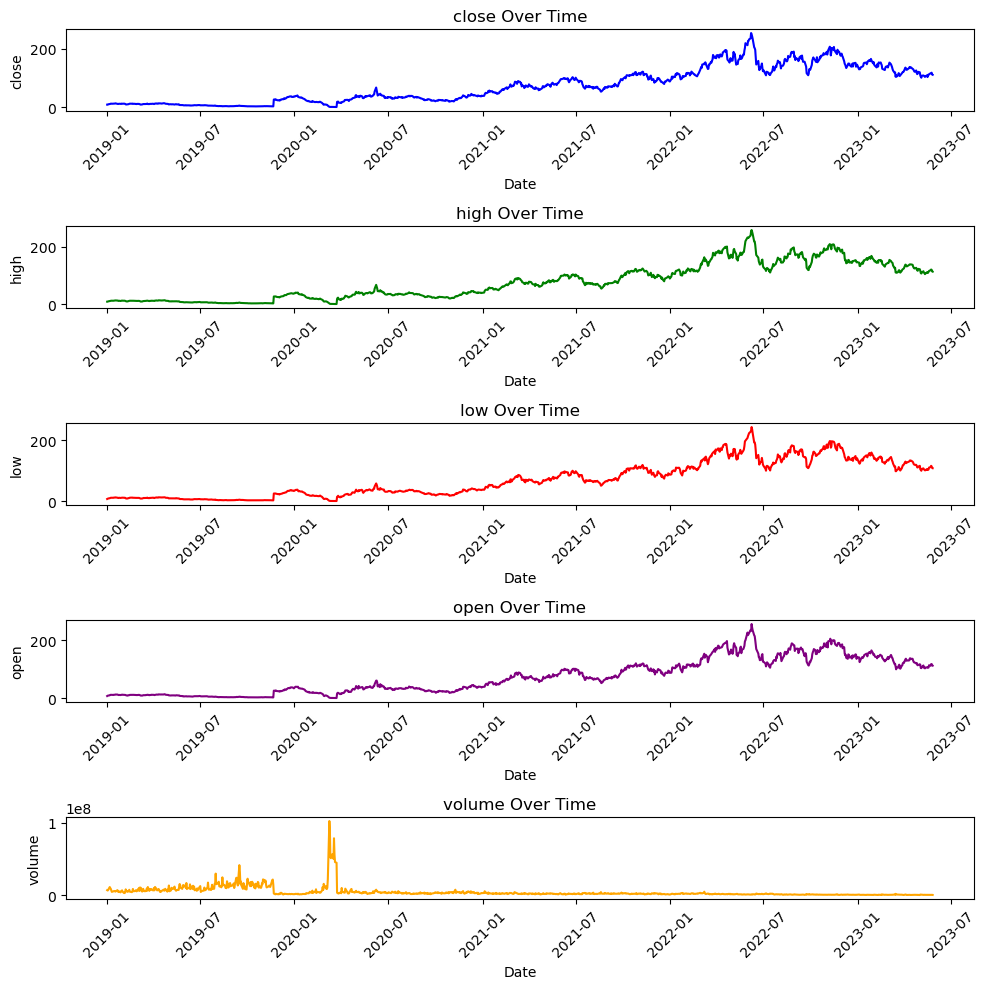

In [11]:
# Since my data is time series, i will plot each column with the date column

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))
columns = ['close', 'high', 'low', 'open', 'volume']
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, column in enumerate(columns):
    axes[i].plot(df['date'], df[column], color=colors[i], linewidth=1.5)
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Date')
    axes[i].set_title(f'{column} Over Time')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The closing price is the most widely used feature for stock price prediction because it reflects the final traded price at the end of a trading day. It encapsulates all the information available throughout the trading session and is influenced by market sentiment, supply and demand, and other external factors. Since my goal is to predict price direction, the close price is directly related to the outcome of what I want to predict.

Plotting the closed price over the year

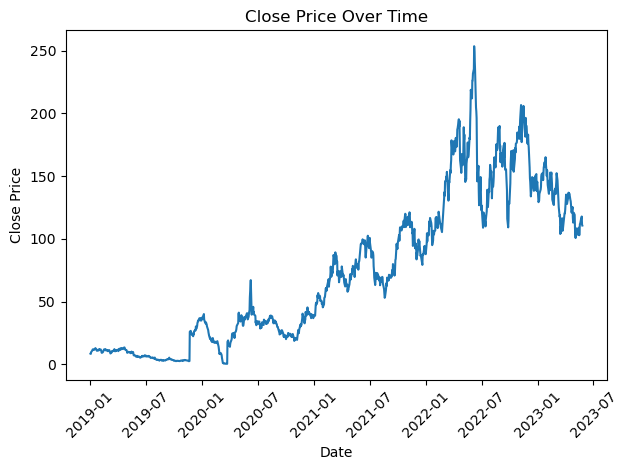

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plotting an Interactive graph using ploty

In [13]:
fig1 = px.line(df, x='date', y='close', title='Close Price Over Time')
fig1.update_xaxes(tickangle=45)
fig1.show()

Price Range Comparison: This will show how the "close" price relates to the "high" and "low" prices.

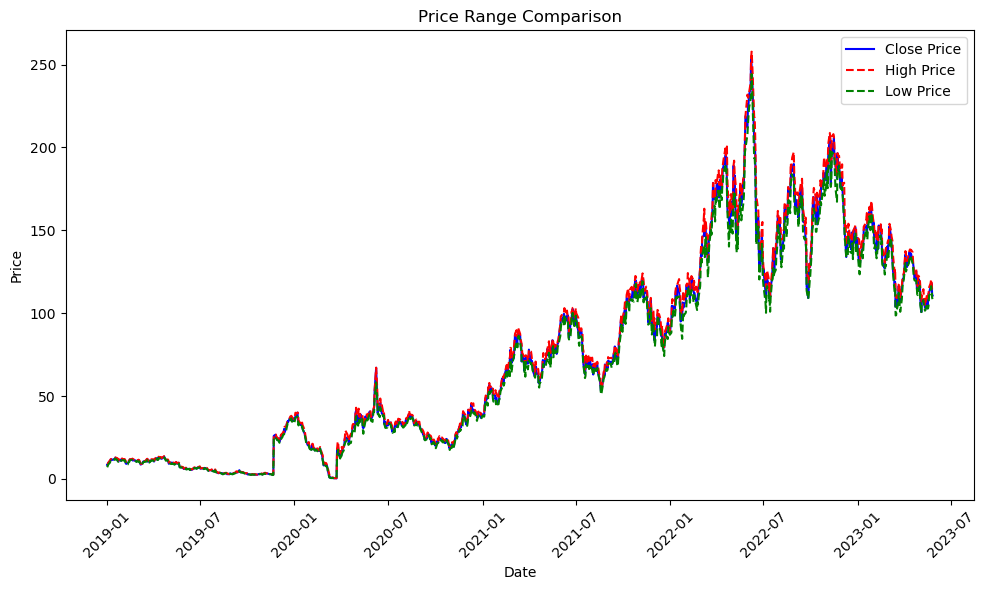

In [14]:
# Visulaize Price Range Comparison
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['high'], label='High Price', color='red',linestyle='dashed')
plt.plot(df['date'], df['low'], label='Low Price', color='green', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Range Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Trend and Moving Averages: This will show how the "close" price follows trends and aligns with moving averages.

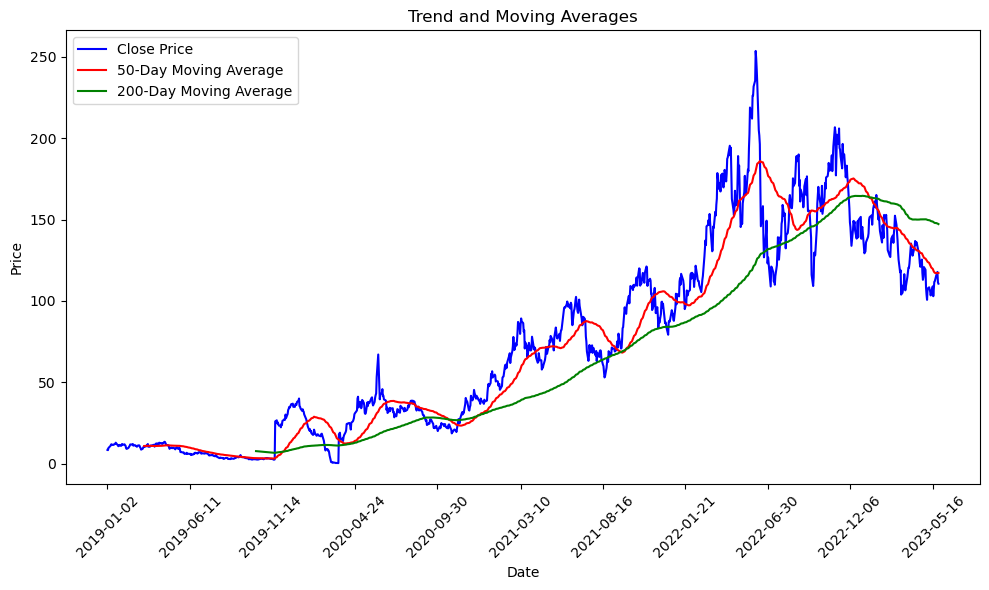

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.plot(df['date'], df['close'].rolling(window=50).mean(), label='50-Day Moving Average', color='red')
plt.plot(df['date'], df['close'].rolling(window=200).mean(), label='200-Day Moving Average', color='green')

# Sample and format x-axis dates
num_xticks = 10  # Number of x-axis ticks
date_format = mdates.DateFormatter('%Y-%m-%d')  # Format of dates

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Trend and Moving Averages')
plt.legend()

# Apply date formatting
plt.gca().xaxis.set_major_formatter(date_format)

# Sample and set x-axis ticks
plt.xticks(df['date'][::len(df['date']) // num_xticks])

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the above graph the blue line represents the actual close prices of the stock over time. It shows the day-to-day fluctuations in the stock's price. Thhe red line represent the 50 days moving average, When the red line is above the blue line, it indicates that the recent average prices have been higher than the long-term average. This could suggest an uptrend in the stock's performance. The green line represents the 200-day moving average. This line provides a longer-term perspective by averaging the close prices over a 200-day period. When the green line is above the blue line, it suggests that the stock's longer-term trend is positive, indicating potential overall growth.

Compare the "close" price with intra-day "open" prices to demonstrate the smoothness and stability of the "close" price.

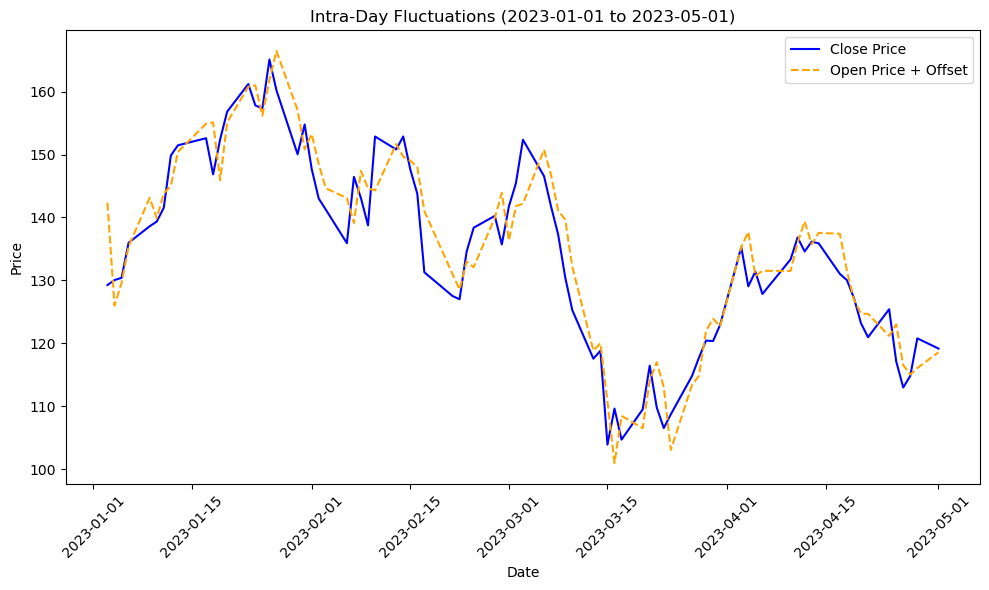

In [16]:
## Intra-Day Fluctuations
start_date1 = '2023-01-01'
end_date1 = '2023-05-01'

filtered_df = df[(df['date'] >= start_date1) & (df['date'] <= end_date1)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_df['date'], filtered_df['close'], label='Close Price', color='blue')
plt.plot(filtered_df['date'], filtered_df['open'] + 1, label='Open Price + Offset', color='orange', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Intra-Day Fluctuations ({start_date1} to {end_date1})')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Save my Interactive grapgh for future use
fig1.write_html('interactive_graph.html')

In [18]:
df.to_csv('GUSHTiingo.csv')

In [19]:
df=pd.read_csv('GUSHTiingo.csv')

In [20]:
df.head()

Unnamed: 0        date  close   high     low   open    volume
0           0  2019-01-02   8.44   8.60   7.010   7.31   6850156
1           1  2019-01-03   8.30   8.74   7.720   8.50   6353016
2           2  2019-01-04   9.65   9.69   8.687   8.90   7241634
3           3  2019-01-07  10.69  10.95   9.670   9.95  11164210
4           4  2019-01-08  10.98  11.45  10.420  11.34   9749182

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1109 non-null   int64  
 1   date        1109 non-null   object 
 2   close       1109 non-null   float64
 3   high        1109 non-null   float64
 4   low         1109 non-null   float64
 5   open        1109 non-null   float64
 6   volume      1109 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 60.8+ KB


In [22]:
df = df.drop('Unnamed: 0', axis=1)

In [23]:
df['date'] = pd.to_datetime(df['date'])

Creating a new data frame will only include the 'close' column only

In [24]:
Close_df=df.reset_index()['close']

In [25]:
Close_df.head()

0     8.44
1     8.30
2     9.65
3    10.69
4    10.98
Name: close, dtype: float64

In [26]:
Close_df.shape

(1109,)

In the following step, I will normalize my input target column ‘close’ by using MinMaxScaler. Scaling my data will help improve the performance and convergence of the LSTM model.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
Close_df=scaler.fit_transform(np.array(Close_df).reshape(-1,1))

In [28]:
Close_df

array([[0.03198932],
       [0.03143656],
       [0.0367668 ],
       ...,
       [0.46381756],
       [0.43823241],
       [0.43538962]])

In [29]:
##splitting dataset into train and test split
training_size=int(len(Close_df)*0.65)
test_size=len(Close_df)-training_size
train_data,test_data=Close_df[0:training_size,:],Close_df[training_size:len(Close_df),:1]

In [30]:
training_size,test_size

(720, 389)

In [31]:
# data precursing 
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(619, 100)
(619,)


(None, None)

In [36]:
print(X_train)

[[0.03198932 0.03143656 0.0367668  ... 0.03266054 0.02673805 0.02681702]
 [0.03143656 0.0367668  0.04087305 ... 0.02673805 0.02681702 0.02579045]
 [0.0367668  0.04087305 0.04201807 ... 0.02681702 0.02579045 0.02618529]
 ...
 [0.37541457 0.38907578 0.3847721  ... 0.43487634 0.46133011 0.45177517]
 [0.38907578 0.3847721  0.34971098 ... 0.46133011 0.45177517 0.44190436]
 [0.3847721  0.34971098 0.33466787 ... 0.45177517 0.44190436 0.43760068]]


In [37]:
print(X_test.shape), print(ytest.shape)

(288, 100)
(288,)


(None, None)

Train-Test Split Visualization 

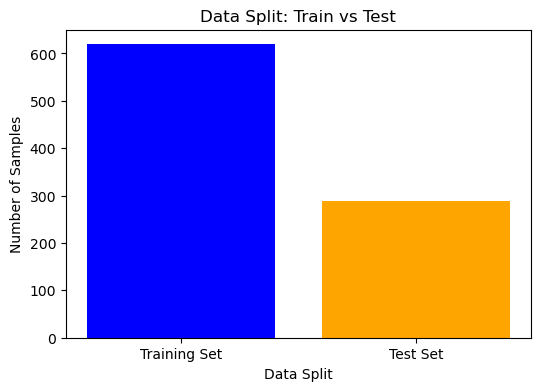

In [38]:
train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

labels = ['Training Set', 'Test Set']
sizes = [train_samples, test_samples]

plt.figure(figsize=(6, 4))
plt.bar(labels, sizes, color=['blue', 'orange'])
plt.xlabel('Data Split')
plt.ylabel('Number of Samples')
plt.title('Data Split: Train vs Test')
plt.show()

Train-Test Split Percentage Graph

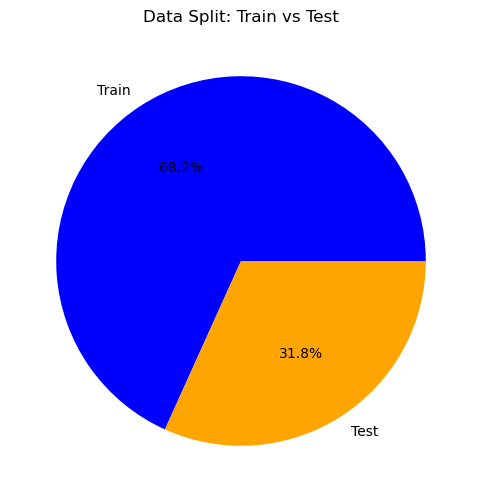

In [39]:
train_size = len(X_train)
test_size = len(X_test)

train_proportion = train_size / (train_size + test_size)
test_proportion = test_size / (train_size + test_size)

labels = ['Train', 'Test']
proportions = [train_proportion, test_proportion]

plt.figure(figsize=(6, 6))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Data Split: Train vs Test')
plt.show()

Train-Test Split Time Step Visualization 

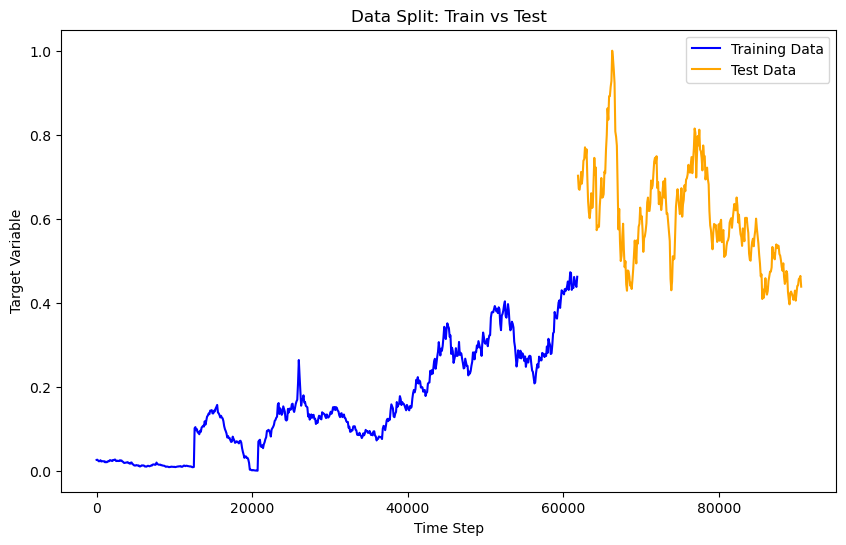

In [40]:
train_size = len(X_train)
test_size = len(X_test)

time_axis_train = range(0, train_size * 100, 100)
time_axis_test = range(train_size * 100, (train_size + test_size) * 100, 100)

plt.figure(figsize=(10, 6))
plt.plot(time_axis_train, y_train, label='Training Data', color='blue')
plt.plot(time_axis_test, ytest, label='Test Data', color='orange')
plt.xlabel('Time Step')
plt.ylabel('Target Variable')
plt.title('Data Split: Train vs Test')
plt.legend()
plt.show()

In [41]:
# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
import tensorflow as ft

2023-08-14 19:38:29.372124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 6s 183ms/step - loss: 0.0149 - val_loss: 0.0346
Epoch 2/100
10/10 [==============================] - 1s 92ms/step - loss: 0.0036 - val_loss: 0.0107
Epoch 3/100
10/10 [==============================] - 1s 91ms/step - loss: 0.0017 - val_loss: 0.0104
Epoch 4/100
10/10 [==============================] - 1s 93ms/step - loss: 0.0014 - val_loss: 0.0095
Epoch 5/100
10/10 [==============================] - 1s 138ms/step - loss: 0.0012 - val_loss: 0.0117
Epoch 6/100
10/10 [==============================] - 1s 109ms/step - loss: 0.0012 - val_loss: 0.0094
Epoch 7/100
10/10 [==============================] - 1s 104ms/step - loss: 9.3838e-04 - val_loss: 0.0088
Epoch 8/100
10/10 [==============================] - 1s 95ms/step - loss: 9.3668e-04 - val_loss: 0.0089
Epoch 9/100
10/10 [==============================] - 1s 94ms/step - loss: 8.3547e-04 - val_loss: 0.0091
Epoch 10/100
10/10 [==============================] - 1s 94ms/step - loss: 8.2795e-0

10/10 [==============================] - 1s 98ms/step - loss: 3.1001e-04 - val_loss: 0.0024
Epoch 79/100
10/10 [==============================] - 1s 99ms/step - loss: 3.3147e-04 - val_loss: 0.0023
Epoch 80/100
10/10 [==============================] - 1s 96ms/step - loss: 3.1879e-04 - val_loss: 0.0039
Epoch 81/100
10/10 [==============================] - 1s 94ms/step - loss: 3.5333e-04 - val_loss: 0.0025
Epoch 82/100
10/10 [==============================] - 1s 96ms/step - loss: 3.2556e-04 - val_loss: 0.0025
Epoch 83/100
10/10 [==============================] - 1s 98ms/step - loss: 3.0554e-04 - val_loss: 0.0035
Epoch 84/100
10/10 [==============================] - 1s 94ms/step - loss: 2.9236e-04 - val_loss: 0.0031
Epoch 85/100
10/10 [==============================] - 1s 96ms/step - loss: 2.8945e-04 - val_loss: 0.0031
Epoch 86/100
10/10 [==============================] - 1s 98ms/step - loss: 2.8337e-04 - val_loss: 0.0049
Epoch 87/100
10/10 [==============================] - 1s 99ms/step -

In [47]:
### Will Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 17ms/step


In [48]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Evaluation
### Calculate the Root Mean Square Error (RMSE) to evaluate my module 
RMSE measures the average magnitude of the errors between the predicted values and the actual values. It provides an indication of how well the model's predictions align with the true

In [49]:
#### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

50.33615375083823

In [50]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

144.97067480412295

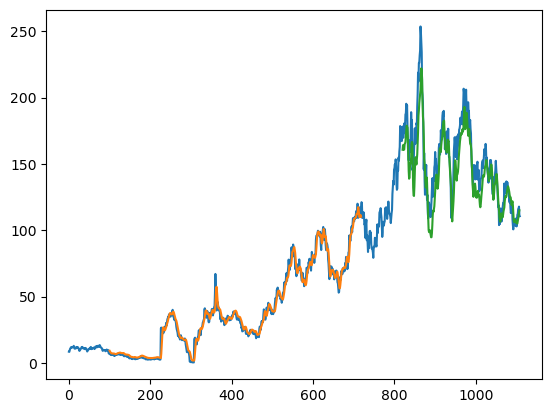

In [51]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(Close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(Close_df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(Close_df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(Close_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
len(test_data)

389

In [53]:
x_input=test_data[289:].reshape(1,-1)
x_input.shape

(1, 100)

In [54]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [76]:
temp_input[:5]

[0.5815960706276256,
 0.5662370889794371,
 0.5170014845699485,
 0.5021163018414985,
 0.5000631731892985]

In [56]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.43857518]
101
1 day input [0.51352696 0.53551913 0.54590322 0.54882498 0.55751129 0.59028238
 0.59667867 0.60114028 0.57843741 0.60039009 0.61784169 0.63513535
 0.62171105 0.61989482 0.65053381 0.63114754 0.59107205 0.60974762
 0.58183297 0.56327585 0.55636628 0.53528223 0.57689756 0.56347326
 0.54645598 0.60220632 0.59407278 0.60224581 0.58159607 0.56623709
 0.51700148 0.5021163  0.50006317 0.52991251 0.54495562 0.55237847
 0.53445308 0.55826147 0.57287027 0.60019268 0.5772924  0.55810354
 0.54069143 0.51388231 0.49331154 0.46279099 0.46776588 0.40885688
 0.43148078 0.41197606 0.4309675  0.45836887 0.43215199 0.41924097
 0.4278878  0.45185413 0.46350169 0.47412268 0.4738463  0.48407246
 0.53279478 0.50819672 0.5174358  0.50337977 0.52505607 0.5388752
 0.53007044 0.53622982 0.53512429 0.5160144  0.51210556 0.50089232
 0.48502006 0.47625478 0.49382482 0.4611327  0.44470767 0.45201207
 0.47554408 0.46914779 0.42599261 0.40869895 0.39614328 0.42326826
 0.42654537 0.42168894 0.41620076 

11 day output [[0.45366302]]
12 day input [0.63513535 0.62171105 0.61989482 0.65053381 0.63114754 0.59107205
 0.60974762 0.58183297 0.56327585 0.55636628 0.53528223 0.57689756
 0.56347326 0.54645598 0.60220632 0.59407278 0.60224581 0.58159607
 0.56623709 0.51700148 0.5021163  0.50006317 0.52991251 0.54495562
 0.55237847 0.53445308 0.55826147 0.57287027 0.60019268 0.5772924
 0.55810354 0.54069143 0.51388231 0.49331154 0.46279099 0.46776588
 0.40885688 0.43148078 0.41197606 0.4309675  0.45836887 0.43215199
 0.41924097 0.4278878  0.45185413 0.46350169 0.47412268 0.4738463
 0.48407246 0.53279478 0.50819672 0.5174358  0.50337977 0.52505607
 0.5388752  0.53007044 0.53622982 0.53512429 0.5160144  0.51210556
 0.50089232 0.48502006 0.47625478 0.49382482 0.4611327  0.44470767
 0.45201207 0.47554408 0.46914779 0.42599261 0.40869895 0.39614328
 0.42326826 0.42654537 0.42168894 0.41620076 0.40684324 0.41434505
 0.42887489 0.40494804 0.42255757 0.43996968 0.44143056 0.45659212
 0.45836887 0.46381756

19 day output [[0.46939102]]
20 day input [0.56327585 0.55636628 0.53528223 0.57689756 0.56347326 0.54645598
 0.60220632 0.59407278 0.60224581 0.58159607 0.56623709 0.51700148
 0.5021163  0.50006317 0.52991251 0.54495562 0.55237847 0.53445308
 0.55826147 0.57287027 0.60019268 0.5772924  0.55810354 0.54069143
 0.51388231 0.49331154 0.46279099 0.46776588 0.40885688 0.43148078
 0.41197606 0.4309675  0.45836887 0.43215199 0.41924097 0.4278878
 0.45185413 0.46350169 0.47412268 0.4738463  0.48407246 0.53279478
 0.50819672 0.5174358  0.50337977 0.52505607 0.5388752  0.53007044
 0.53622982 0.53512429 0.5160144  0.51210556 0.50089232 0.48502006
 0.47625478 0.49382482 0.4611327  0.44470767 0.45201207 0.47554408
 0.46914779 0.42599261 0.40869895 0.39614328 0.42326826 0.42654537
 0.42168894 0.41620076 0.40684324 0.41434505 0.42887489 0.40494804
 0.42255757 0.43996968 0.44143056 0.45659212 0.45836887 0.46381756
 0.43823241 0.43538962 0.43857518 0.43250462 0.42889678 0.42712888
 0.42700246 0.4284010

27 day output [[0.47727358]]
28 day input [0.60224581 0.58159607 0.56623709 0.51700148 0.5021163  0.50006317
 0.52991251 0.54495562 0.55237847 0.53445308 0.55826147 0.57287027
 0.60019268 0.5772924  0.55810354 0.54069143 0.51388231 0.49331154
 0.46279099 0.46776588 0.40885688 0.43148078 0.41197606 0.4309675
 0.45836887 0.43215199 0.41924097 0.4278878  0.45185413 0.46350169
 0.47412268 0.4738463  0.48407246 0.53279478 0.50819672 0.5174358
 0.50337977 0.52505607 0.5388752  0.53007044 0.53622982 0.53512429
 0.5160144  0.51210556 0.50089232 0.48502006 0.47625478 0.49382482
 0.4611327  0.44470767 0.45201207 0.47554408 0.46914779 0.42599261
 0.40869895 0.39614328 0.42326826 0.42654537 0.42168894 0.41620076
 0.40684324 0.41434505 0.42887489 0.40494804 0.42255757 0.43996968
 0.44143056 0.45659212 0.45836887 0.46381756 0.43823241 0.43538962
 0.43857518 0.43250462 0.42889678 0.42712888 0.42700246 0.42840105
 0.4311327  0.43490934 0.43939739 0.44423676 0.449094   0.45366302
 0.45772111 0.46112487

In [57]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [58]:
import matplotlib.pyplot as plt

In [59]:
len(Close_df)

1109

Text(0.5, 1.0, 'Price vs. Day')

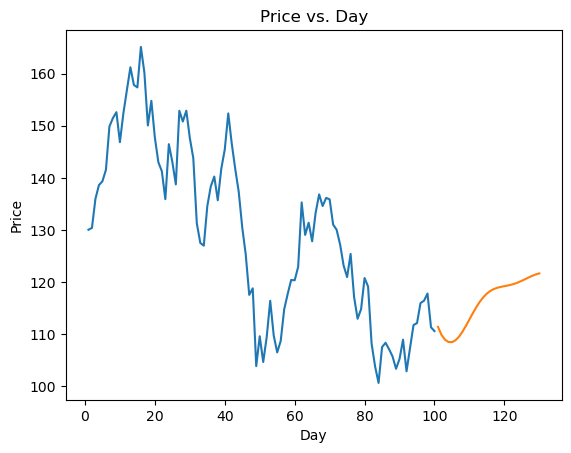

In [77]:
plt.plot(day_new,scaler.inverse_transform(Close_df[1009:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Price vs. Day')

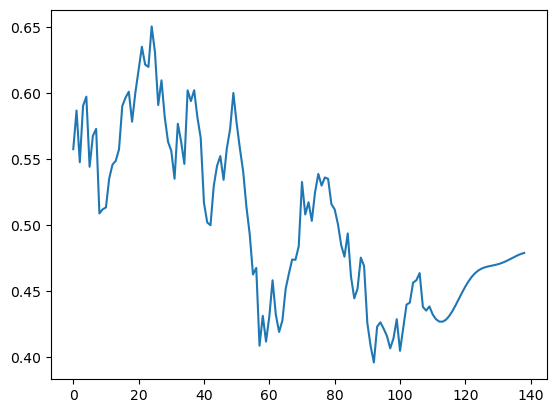

In [61]:
## Attach the prediction to the main graph 
df3=Close_df.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

Obtain the data for June month and compare it to our prediction result.

In [64]:
# Create a Tiingo account to obtain an API that will use it for the pandas’ Datareader library. 
Tiingo_symbols = ['GUSH']
startdate_june = datetime(2023,6,1)
enddate_june = datetime(2023,6,30)
df_june = pdr.get_data_tiingo(Tiingo_symbols, start=startdate_june, end=enddate_june, api_key="1856777bbfc2e350f804bfd660d12ee0d35a50c3")
df_june.head()

/Users/hassan/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



close      high      low      open  volume  \
symbol date                                                                     
GUSH   2023-06-01 00:00:00+00:00  104.54  107.6121  101.740  103.5000  302062   
       2023-06-02 00:00:00+00:00  112.96  113.8900  107.785  108.6143  521055   
       2023-06-05 00:00:00+00:00  109.87  117.6300  109.350  117.2100  406700   
       2023-06-06 00:00:00+00:00  113.85  114.1599  106.170  106.8400  361547   
       2023-06-07 00:00:00+00:00  122.33  122.5600  115.320  115.3200  610688   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
GUSH   2023-06-01 00:00:00+00:00  103.698754  106.746132  100.921286   
       2023-06-02 00:00:00+00:00  112.050997  112.973513  106.917641   
       2023-06-05 00:00:00+00:00  108.985862  116.683417  108.470047   
       2023-06-06 00:00:00+00:00  112.933835  113.241241  105.315637   
       2023-06-07 00:00:00+00:00  121.345595  121.573744  114.392006   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
GUSH   2023-06-01 00:00:00+00:00  102.667123     302062      0.0          1.0  
       2023-06-02 00:00:00+00:00  107.740267     521055      0.0          1.0  
       2023-06-05 00:00:00+00:00  116.266796     406700      0.0          1.0  
       2023-06-06 00:00:00+00:00  105.980245     361547      0.0          1.0  
       2023-06-07 00:00:00+00:00  114.392006     610688      0.0          1.0

In [65]:
df_june.reset_index(inplace=True)
df_june['date'] = pd.to_datetime(df_june['date']).dt.date

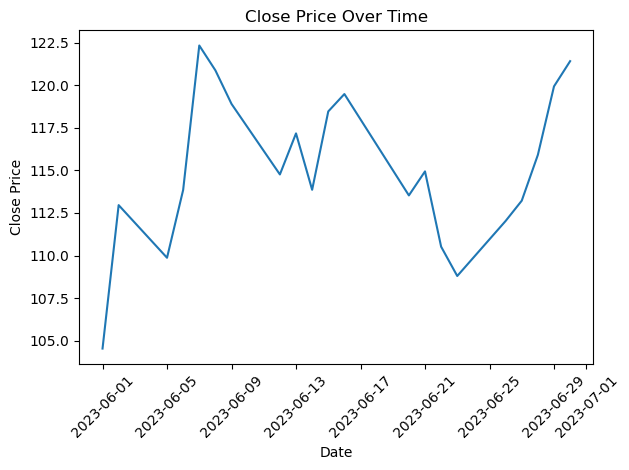

In [66]:
## Plot June month and compare it with our prediction
plt.plot(df_june['date'], df_june['close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusion:  
•After applying the LSTM model and making predictions, I found that the oil and gas sector is expected to experience an upward trend in the next thirty days.  
•It's important to note that this prediction serves as an example to showcase the functionality of the RNN LSTM model. In real-world scenarios, the actual trend observed for the month of June was predominantly upward.  